# Import the libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read the Data

In [2]:
df = pd.read_csv('Customer_Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


##  Data Preprocessing

### Drop the unnecesary columns

In [3]:
x = df.drop(['CustomerId','Surname','RowNumber','Exited'], axis=1)
y = df['Exited']

### Transform the object columns into a categorical

In [4]:
# Transform the text values into categorical
label = LabelEncoder()
x['Geography'] = label.fit_transform(x['Geography'])
x['Gender'] = label.fit_transform(x['Gender'])
x.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
5,645,2,1,44,8,113755.78,2,1,0,149756.71
6,822,0,1,50,7,0.00,2,1,1,10062.80
7,376,1,0,29,4,115046.74,4,1,0,119346.88
8,501,0,1,44,4,142051.07,2,0,1,74940.50
9,684,0,1,27,2,134603.88,1,1,1,71725.73


In [5]:
x = pd.get_dummies(x, drop_first=True, columns=['Geography'])
x.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_1,Geography_2
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1


### Features Scaling

In [6]:
x_train, x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42, stratify=y)

In [7]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.fit_transform(x_test)

### Model Building - ANN


In [8]:
model = Sequential()
model.add(Dense(x.shape[1], activation='relu', input_dim = x.shape[1]))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [9]:
# Verify the structure of the ANN
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                132       
_________________________________________________________________
dense_1 (Dense)              (None, 256)               3072      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 36,229
Trainable params: 36,229
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer=Adam(lr=0.005), loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(x_train,y_train.to_numpy(),batch_size=16, epochs=15, verbose=1, validation_split=0.2)

Train on 6400 samples, validate on 1600 samples
Epoch 1/15
6400/6400 [==============================] - 4s 588us/sample - loss: 0.4238 - accuracy: 0.8233 - val_loss: 0.3671 - val_accuracy: 0.8594
Epoch 2/15
6400/6400 [==============================] - 2s 248us/sample - loss: 0.3681 - accuracy: 0.8495 - val_loss: 0.3482 - val_accuracy: 0.8600
Epoch 3/15
6400/6400 [==============================] - 2s 247us/sample - loss: 0.3587 - accuracy: 0.8514 - val_loss: 0.3440 - val_accuracy: 0.8744
Epoch 4/15
6400/6400 [==============================] - 2s 239us/sample - loss: 0.3503 - accuracy: 0.8578 - val_loss: 0.3369 - val_accuracy: 0.8694
Epoch 5/15
6400/6400 [==============================] - 2s 285us/sample - loss: 0.3498 - accuracy: 0.8572 - val_loss: 0.3329 - val_accuracy: 0.8719
Epoch 6/15
6400/6400 [==============================] - 2s 266us/sample - loss: 0.3462 - accuracy: 0.8570 - val_loss: 0.3376 - val_accuracy: 0.8681
Epoch 7/15
6400/6400 [==============================] - 2s 248us

In [12]:
y_pred = model.predict_classes(x_test)

### Confusion Matrix

In [13]:
confusion_matrix(y_test,y_pred)

array([[1539,   54],
       [ 212,  195]], dtype=int64)

In [14]:
accuracy_score(y_test,y_pred)

0.867

## Plot the Learning Curve and Confusion Matrix

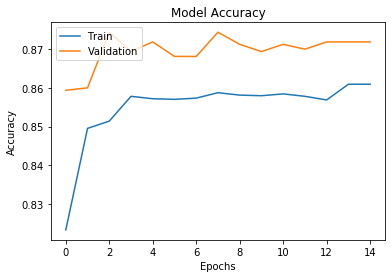

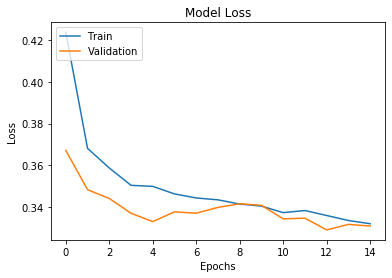

In [15]:
 # Plot accuracy Values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.show()

 # Plot loss Values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.show()